In [4]:

import numpy as np
import json
import os

import cv2
import mediapy as media

import mujoco
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import importlib


# import arm_env

# Preparation

""

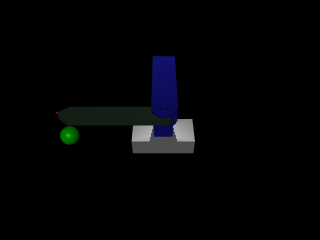

In [2]:
xml_path = "2dof_robot.xml"

# Read the XML content from the file
with open(xml_path, 'r') as file:
    my_robot_xml = file.read()
model = mujoco.MjModel.from_xml_string(my_robot_xml)
# randomize_ball_position(model, seed=None)
data = mujoco.MjData(model)
height = 480
width = 640


with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)
  media.show_image(renderer.render())

## Let's try testing randomizing ball position

In [20]:
def load_json_variables(json_path='global_var.json'):
    with open(json_path, 'r') as f:
        json_data = json.load(f)
    return json_data

def randomize_ball_position(mymodel, seed=None):
  if seed is not None:
    np.random.seed(seed)
  
  json_vars = load_json_variables()

  radius = np.random.uniform(json_vars['robot_min_sweep_radius'], json_vars['robot_max_sweep_radius'])
  angle = np.random.uniform(0, 2 * np.pi)
  ball_pos_x = radius * np.cos(angle)
  ball_pos_y = radius * np.sin(angle)

  print(radius, angle, ball_pos_x, ball_pos_y)
  print('Original ball position:', mymodel.body_pos[mujoco.mj_name2id(mymodel, mujoco.mjtObj.mjOBJ_BODY, 'ball')])
  print('New ball position:', [ball_pos_x, ball_pos_y])
  mymodel.body_pos[mujoco.mj_name2id(mymodel, mujoco.mjtObj.mjOBJ_BODY, 'ball')][0] = ball_pos_x
  mymodel.body_pos[mujoco.mj_name2id(mymodel, mujoco.mjtObj.mjOBJ_BODY, 'ball')][1] = ball_pos_y

1.96382992691778 5.556684637220311 1.4679696104079454 -1.3044896338325722
Original ball position: [-1.  -1.2  1.5]
New ball position: [np.float64(1.4679696104079454), np.float64(-1.3044896338325722)]


""

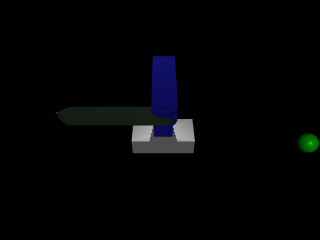

In [21]:
# Read the XML content from the file
with open(xml_path, 'r') as file:
    my_robot_xml = file.read()
model = mujoco.MjModel.from_xml_string(my_robot_xml)
randomize_ball_position(model, seed=None)
data = mujoco.MjData(model)
height = 480
width = 640


with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)
  media.show_image(renderer.render())